# SuperCon EDA

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Load SueprCon data
supercon_path = "../data/raw/supercon.csv"
supercon = pd.read_csv(supercon_path)

In [19]:
supercon

H   He   Li    Be    B    C    N    O    F   Ne  ...   Ac   Th   Pa  \
0      0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0   0.0  0.0  0.0  0.0  4.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0   0.0  0.0  0.0  0.0  4.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
16382  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
16383  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
16384  0.0  0.0  0.0  22.5  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
16385  0.0  0.0  0.0  27.5  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
16386  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

         U   Np   Pu   Am   Cm  critical_temp                      material  
0      0.0  0.0  0.0  0.0  0.0       0.000500                Au0.978In0.022  
1      0.0  0.0  0.0  0.0  0.0       0.001000        Gd0.9Pr0.95Ce0.15Cu1O4  
2      0.0  0.0  0.0  0.0  0.0       0.001000    La1.92Sr0.08Cu0.99Ni0.01O4  
3      0.0  0.0  0.0  0.0  0.0       0.006500                    Ag0.9Ga0.1  
4      0.0  0.0  0.0  0.0  0.0       0.007400                  Ag0.81In0.19  
...    ...  ...  ...  ...  ...            ...                           ...  
16382  0.0  0.0  0.0  0.0  0.0       4.200000                 Zr2Co0.6Ni0.4  
16383  0.0  0.0  0.0  0.0  0.0       5.973333               Zr2Co0.85Ni0.15  
16384  0.0  0.0  0.0  0.0  0.0       1.000000  Zr41.2Ti13.8Cu12.5Ni10Be22.5  
16385  0.0  0.0  0.0  0.0  0.0       2.800000  Zr46.75Ti8.25Cu7.5Ni10Be27.5  
16386  0.0  0.0  0.0  0.0  0.0       3.215000              Zr62.4Ti15.6Ni22  

[16387 rows x 98 columns]

# Critical Temperature

we inspect critical temperature distribution, its shape, center, spread and position.

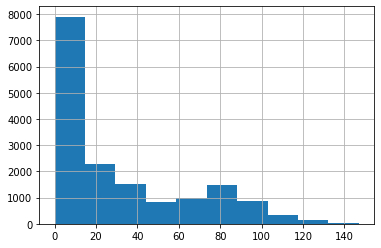

In [6]:
critical_temperature = supercon['critical_temp']
critical_temperature.hist()

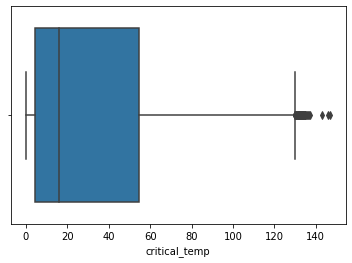

In [10]:
sns.boxplot(x = critical_temperature,whis=1.5)

It's right skewed distribution, most of the samples are under Tc:60 K; we don't expect regressor to be reliable for materials above ~100 K. We have to point out that critical temperature is bounded below by 0 K; if a given material IS a supercondutor and the ML model predict a critical temperature above 100 K, we know that is is at least 100 K but we are not sure about the real value. 

In [27]:
print(f"median : {critical_temperature.median()}\nmin & max temperature :{critical_temperature.min(),critical_temperature.max()}\n25 & 75 percentile: {np.percentile(critical_temperature,[25,75])}")

median : 16.0
min & max temperature :(0.0005, 147.0)
25 & 75 percentile: [ 4.3225 54.5   ]


# Elements

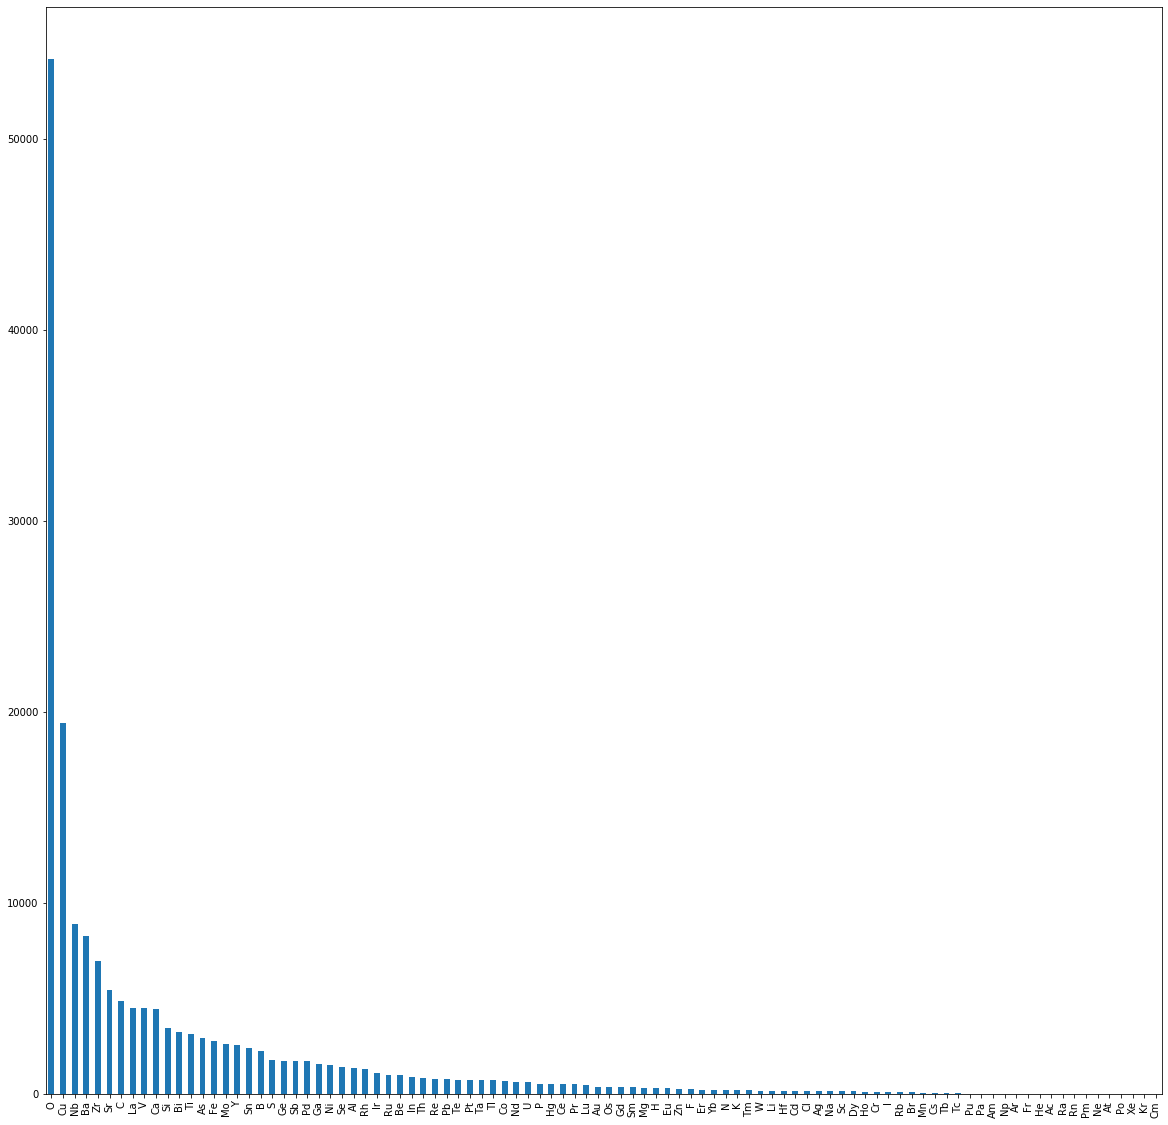

In [28]:
supercon_elements = supercon.iloc[:,:-2]
# We inspect the distribution of elements on superconducting materials
supercon_elements.sum().sort_values(ascending=False).plot.bar(figsize=(20,20))

In [76]:
supercon_elements.sum().sort_values(ascending=False).head(16)

O     54200.96770
Cu    19442.97410
Nb     8889.25500
Ba     8297.57000
Zr     6988.47350
Sr     5442.47380
C      4880.79440
La     4526.60050
V      4517.79260
Ca     4483.22820
Si     3475.00450
Bi     3285.24900
Ti     3158.27515
As     2966.71700
Fe     2810.93835
Mo     2649.48890
dtype: float64

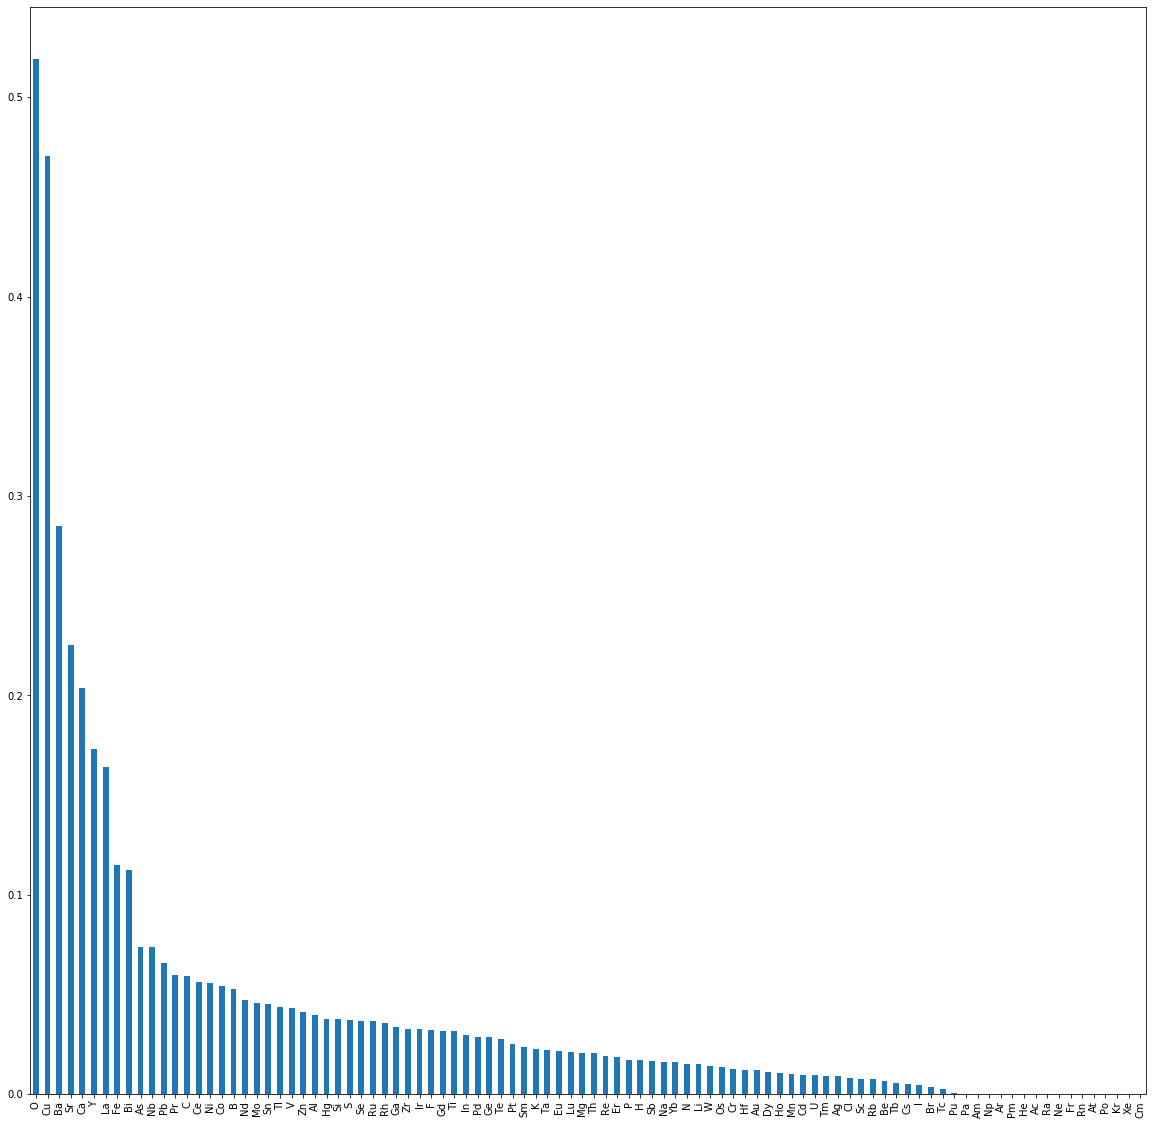

In [30]:
# NOw we look at the percentage of elements that appear on a chemical formula at least one
((supercon_elements>0).sum()/supercon_elements.shape[0]).sort_values(ascending=False).plot.bar(figsize= (20,20))


In [75]:
((supercon_elements>0).sum()/supercon_elements.shape[0]).sort_values(ascending=False).head(15)


O     0.519253
Cu    0.470556
Ba    0.285165
Sr    0.225362
Ca    0.204003
Y     0.173247
La    0.164155
Fe    0.114847
Bi    0.112467
As    0.074083
Nb    0.073717
Pb    0.065906
Pr    0.059681
C     0.059315
Ce    0.056203
dtype: float64

In [72]:
# We compute the average number of atoms for chemical formula
(supercon_elements.sum()/(supercon_elements>0).sum()).sort_values(ascending=False).head(15)


Zr    13.111583
Be     8.721987
Nb     7.358655
O      6.369840
V      6.336315
Sb     6.286988
Ti     6.108849
Si     5.622985
C      5.021393
U      4.075636
Ge     3.746952
Pd     3.645366
Mo     3.537368
Sn     3.270179
S      2.911751
dtype: float64

In [70]:
most_common_elements = list(((supercon_elements>0).sum()/supercon_elements.shape[0]).sort_values(ascending=False).head(10).index)
supercon_elements[most_common_elements].corr().style.background_gradient()

In [67]:
(supercon_elements[most_common_elements]>0).corr().style.background_gradient()

Oxygen is the most present element both in percentage of compounds and in absolute number of atoms, showing an average of 6 oxygen atoms per material. Nb is very present in the dataset but only in absolute number and not in percentage of materials, in fact it has an average quantity greater than oxygen but in the percentage of materials it is not even among the top 10. Other elements very present both in percentage of materials and in absolute number they are Cu, Ba, Sr, Ca. The elements Cu, Ba, Sr, Ca are strongly correlated with the presence of oxygen, to a lesser extent Y and Ba, not at all Fe, La and As. Cu is correlated to the presence of Ba, Sr, ca and Y; Ba with Y; Sr and Ca with Bi. There is a strong correlation between the presence of Fe and As.